In [6]:
# FUNZIONI MATEMATICHE

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def pos(X):
    '''
    dato un array torna l'array dei massimi tra 0 e l'elemento
    '''
    return np.maximum(0,X)

def pos_primo(X):
    return X>0

def prob(X):
    '''
    dato un array, mi ritorna un array di probabilità
    '''
    Y = np.exp(X) / sum(np.exp(X))
    return Y

def matrice_cifre(X):
    '''
    mi trasforma la risposta esatta in una matrice 10x1
    dove ho 1 nell indice del numero
    '''
    Y = np.zeros((X.size, X.max() + 1))
    Y[np.arange(X.size), X] = 1
    Y = Y.T
    return Y

In [7]:
# DATI

# useremo il database MNSIT delle cifre

data = pd.read_csv('train.csv')
data = np.array(data) #converto in array
m, n = data.shape
np.random.shuffle(data) # mettiamo in ordine casuale



data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [8]:
# FUNZIONI PER LA RETE

# le immagini sono 28x28 (quindi ho un input di dimensione 784)
# sono in bianco e nero, numerizzate come 0 = bianco, 258 = nero

def crea_parametri():
    '''
    crea casualmente pesi e soglie della rete
    '''
    W1 = np.random.rand(10, 784) - 0.5 #pesi dello strato hidden. -0.5 così i valori sono tra -0.5 e 0.5
    theta1 = np.random.rand(10, 1) - 0.5 #soglie dello strato hidden
    W2 = np.random.rand(10, 10) - 0.5 #pesi dello strato output
    theta2 = np.random.rand(10, 1) - 0.5 #soglie dello strato output
    return W1, theta1, W2, theta2


def output_strati(W1, theta1, W2, theta2, X):
    '''
    date le matrice dei pesi e le soglie mi ritorna le matrici deli output di ciascuno strato
    W1, W2 sono i pesi degli strati
    thetha1, thetha2 sono le soglie degli strati
    X è il vettore esempio
    '''
    Y1 = W1.dot(X) + theta1
    A1 = pos(Y1)
    Y2 = W2.dot(A1) + theta2
    A2 = prob(Y2)
    return Y1, A1, Y2, A2


def back_propagation(Y1, A1, Y2, A2, W1, W2, X, Y):
    '''
    implementa l algoritmo di back-propagation, mi ritorna le variazioni
    Y1, Y2 sono gli output degli strati
    A1, A2 sono gli output modificati (uno con pos, l altro con prob) degli strati
    W1, W2 sono le matrici dei pesi degli strati
    X è il vettore di input
    Y è il vettore di output desiderato
    '''
    m = X.shape[1] #dimensione dell'input
    Y_mat = matrice_cifre(Y) #mi serve un vettore 10x1 a valori in {0,1}
    dY2 = A2- Y_mat
    dW2 = 1 / m * dY2.dot(A1.T)
    dtheta2 = 1 / m * np.sum(dY2)
    dY1 = W2.T.dot(dY2) * pos_primo(Y1)
    dW1 = 1 / m * dY1.dot(X.T)
    dtheta1 = 1 / m * np.sum(dY1)
    return dW1, dtheta1, dW2, dtheta2


def agg_parametri(W1, theta1, W2, theta2, dW1, dtheta1, dW2, dtheta2, epsilon):
    W1 = W1 - epsilon * dW1
    theta1 = theta1 - epsilon * dtheta1
    W2 = W2 - epsilon * dW2
    theta2 = theta2 - epsilon * dtheta2
    return W1, theta1, W2, theta2


def get_precisione(X, Y):
    return np.sum(X == Y) / Y.size


def rete(X, Y, iterazioni=500, epsilon=0.1, stampa=False):
    '''
    dati un insieme di esempi e uno di risposte, crea una rete neurale (ovvero 4 array)
    iterazioni è il numero di volte che gira l algoritmo
    epsilon è il coefficiente di aggiornamento dei pesi
    stampa fa si che ogni 10 iterazioni ricevo 
    '''
    W1, theta1, W2, theta2 = crea_parametri() #inizio con valori casuali
    for i in range(iterazioni): # aggiorno i parametri
        Y1, A1, Y2, A2 = output_strati(W1, theta1, W2, theta2, X)
        dW1, dtheta1, dW2, dtheta2 = back_propagation(Y1, A1, Y2, A2, W1, W2, X, Y)
        W1, theta1, W2, theta2 = agg_parametri(W1, theta1, W2, theta2, dW1, dtheta1, dW2, dtheta2, epsilon)
        if stampa and i%10 == 0:
            print("iterazione numero: " + str(i))
            print("precisione: " + str(get_precisione(np.argmax(A2, 0), Y)))
    return W1, theta1, W2, theta2

In [9]:
# FUNZIONI DI UTILIZZO

def get_risposta(W1, theta1, W2, theta2, X):
    '''
    Data una rete composta da W1, theta1, W2, theta2, e un esempio X, la rete dà l'output
    '''
    Y1, A1, Y2, A2 = output_strati(W1, theta1, W2, theta2, X)
    risultato = np.argmax(A2, 0) # mi torna l'indice della probabilità più alta
    return risultato

def utilizza_rete(X_test, Y_test, indice, W1, theta1, W2, theta2):
    '''
    dato un insieme di esempi con risposta, un indice, e la rete
    stampa l'immagine del suddetto indice, indicandone la risposta corretta e la risposta della rete.
    '''
    risultato = get_risposta(W1, theta1, W2, theta2, X_test[:, indice, None])
    risultato_esatto = Y_test[indice]
    #mostro l'immagine
    immagine = X_test[:, indice, None]
    immagine = immagine.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(immagine, interpolation='nearest')
    plt.show()
    #dico l'output della rete e quello desiderato
    print("la risposta corretta è: " + str(risultato_esatto))
    print("secondo la mia rete la risposta è: " + str(risultato))
    print("\n")

# Rete Feed Forward

Questo codice è in grado di generare una rete neurale che implementando l'algoritmo di back propagation è in grado di riconoscere le cifre scritte a mano

## Caratteristiche

La rete è composta da due strati.
Abbiamo un input di dimensione 28x28=784 che rappresenta i pixel delle immagini.
Lo strato hidden è composto da 10 neuroni, ogn'uno con 784 pesi (matrice $W1$, 10x784), e una matrice $\theta1$ 10x1 che rappresenta le soglie.
In particolare non ho un'unico neurone che da output bensì ne ho 10, ciascuno con 10 pesi (matrice $W2$, 10x10) e le soglie (matrice $\theta2$, 10x1).
Di conseguenza l'output è un vettore. Tale vettore è un vettore di probabilità che la rete attribuisce all'input di essere una delle 10 cifre

### Costruzione

Creiamo la rete neurale, che è interamente contenuta nei pesi e nelle soglie dei suoi due strati, fornendole:
- un insieme di esempi ($X \, train$) muniti di risposte ($Y \, train$)
- *opz.* il numero di passi da compiere (<ins>oss.</ins> la rete non ha altri criteri di stop)
- *opz.* il valore del coefficiente $\epsilon$ per la discesa lungo il gradiente
- *opz.* se vogliamo stampare la precisione durante l'apprendimento diamo il valore **True**, altrimenti **False**

La rete non è un oggetto in se, bensì sono 4 matrici, o meglio 4 array.

In [12]:
W1, theta1, W2, theta2 = rete(X_train, Y_train, 200, 0.1, True)

iterazione numero: 0
precisione: 0.10992682926829268
iterazione numero: 10
precisione: 0.14441463414634145
iterazione numero: 20
precisione: 0.17090243902439026
iterazione numero: 30
precisione: 0.2070731707317073
iterazione numero: 40
precisione: 0.2665365853658537
iterazione numero: 50
precisione: 0.3773658536585366
iterazione numero: 60
precisione: 0.45207317073170733
iterazione numero: 70
precisione: 0.5103414634146342
iterazione numero: 80
precisione: 0.5621219512195123
iterazione numero: 90
precisione: 0.6020487804878049
iterazione numero: 100
precisione: 0.6324390243902439
iterazione numero: 110
precisione: 0.658219512195122
iterazione numero: 120
precisione: 0.6794146341463415
iterazione numero: 130
precisione: 0.697390243902439
iterazione numero: 140
precisione: 0.7121951219512195
iterazione numero: 150
precisione: 0.7258780487804878
iterazione numero: 160
precisione: 0.7365365853658536
iterazione numero: 170
precisione: 0.7471707317073171
iterazione numero: 180
precisione: 0.

### Utilizzo

Forniamo alla rete alcuni esempi, e vediamo che risposta ci dà

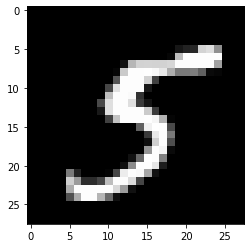

la risposta corretta è: 5
secondo la mia rete la risposta è: [5]




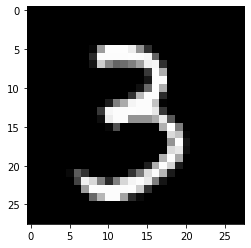

la risposta corretta è: 3
secondo la mia rete la risposta è: [3]




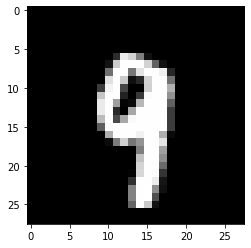

la risposta corretta è: 9
secondo la mia rete la risposta è: [9]




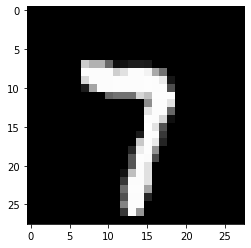

la risposta corretta è: 7
secondo la mia rete la risposta è: [7]




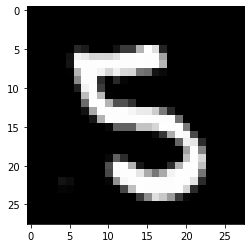

la risposta corretta è: 5
secondo la mia rete la risposta è: [5]




In [15]:
for i in range(5):
    num = random.randint(1, 1000)
    utilizza_rete(X_test, Y_test, num, W1, theta1, W2, theta2)

#### Bibliografia

- Introduzione alla Teoria delle Reti Neurali, Marco Budinich
- [Deep Learning (Part 1) - Feedforward neural networks (FNN)](https://training.galaxyproject.org/training-material/topics/statistics/tutorials/FNN/tutorial.html), Kaivan Kamali